# IBM Data Science Capstone Project 
# Collision Severity Prediction

In [1]:
import os
os.getcwd()

'd:\\DataScience'

In [2]:
os.chdir('D:\\DataScience\\IBM Data Science Capstone\\')

In [3]:
import numpy as np
import pandas as pd

## Load the SPD Traffic Records' Collisions Data Set

In [4]:
df = pd.read_csv('Data-Collisions.csv')
#https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

D:\Users\Pablo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
df.shape

(194673, 38)

In [7]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [8]:
max_len = 0
for col in df.columns:
    if max_len <= len(col):
        max_len = len(col)
print(max_len)
total_len = max_len + len(str(df.shape[0])) + 3
print(total_len)

14
23


In [9]:
print("Unique value count:\n")

        
for col in df.columns:
    unique_vals =len(df[col].unique())
    gap = total_len - len(str(col)) - len(str(unique_vals))
    print(str(col),' ' * gap,unique_vals)

Unique value count:

SEVERITYCODE            2
X                   23564
Y                   23840
OBJECTID           194673
INCKEY             194673
COLDETKEY          194673
REPORTNO           194670
STATUS                  2
ADDRTYPE                4
INTKEY               7615
LOCATION            24103
EXCEPTRSNCODE           3
EXCEPTRSNDESC           2
SEVERITYCODE.1          2
SEVERITYDESC            2
COLLISIONTYPE          11
PERSONCOUNT            47
PEDCOUNT                7
PEDCYLCOUNT             3
VEHCOUNT               13
INCDATE              5985
INCDTTM            162058
JUNCTIONTYPE            8
SDOT_COLCODE           39
SDOT_COLDESC           39
INATTENTIONIND          2
UNDERINFL               5
WEATHER                12
ROADCOND               10
LIGHTCOND              10
PEDROWNOTGRNT           2
SDOTCOLNUM         114933
SPEEDING                2
ST_COLCODE            116
ST_COLDESC             63
SEGLANEKEY           1955
CROSSWALKKEY         2198
HITPARKEDCAR     

In [10]:
df.nunique()

SEVERITYCODE           2
X                  23563
Y                  23839
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194670
STATUS                 2
ADDRTYPE               3
INTKEY              7614
LOCATION           24102
EXCEPTRSNCODE          2
EXCEPTRSNDESC          1
SEVERITYCODE.1         2
SEVERITYDESC           2
COLLISIONTYPE         10
PERSONCOUNT           47
PEDCOUNT               7
PEDCYLCOUNT            3
VEHCOUNT              13
INCDATE             5985
INCDTTM           162058
JUNCTIONTYPE           7
SDOT_COLCODE          39
SDOT_COLDESC          39
INATTENTIONIND         1
UNDERINFL              4
WEATHER               11
ROADCOND               9
LIGHTCOND              9
PEDROWNOTGRNT          1
SDOTCOLNUM        114932
SPEEDING               1
ST_COLCODE           115
ST_COLDESC            62
SEGLANEKEY          1955
CROSSWALKKEY        2198
HITPARKEDCAR           2
dtype: int64

In [11]:
for col in df.columns:
    print("\nUnique values in",col,":")
    unique_values = df[col].unique()
    if len(unique_values) < 20:
        print(unique_values,'\n')
    else:
        print(unique_values[0:5], 
              "\n... (additional",
              len(unique_values)-5,
              " values not shown)")


Unique values in SEVERITYCODE :
[2 1] 


Unique values in X :
[-122.3231484 -122.3472943 -122.33454   -122.3348033 -122.3064263] 
... (additional 23559  values not shown)

Unique values in Y :
[47.70314032 47.64717249 47.60787143 47.60480289 47.54573946] 
... (additional 23835  values not shown)

Unique values in OBJECTID :
[1 2 3 4 5] 
... (additional 194668  values not shown)

Unique values in INCKEY :
[ 1307 52200 26700  1144 17700] 
... (additional 194668  values not shown)

Unique values in COLDETKEY :
[ 1307 52200 26700  1144 17700] 
... (additional 194668  values not shown)

Unique values in REPORTNO :
['3502005' '2607959' '1482393' '3503937' '1807429'] 
... (additional 194665  values not shown)

Unique values in STATUS :
['Matched' 'Unmatched'] 


Unique values in ADDRTYPE :
['Intersection' 'Block' 'Alley' nan] 


Unique values in INTKEY :
[37475.    nan 34387. 36974. 29510.] 
... (additional 7610  values not shown)

Unique values in LOCATION :
['5TH AVE NE AND NE 103RD ST' 'A

In [12]:
print("Amount of missing values")
[print(col,':',df[col].isna().sum()) for col in df.columns]

Amount of missing values
SEVERITYCODE : 0
X : 5334
Y : 5334
OBJECTID : 0
INCKEY : 0
COLDETKEY : 0
REPORTNO : 0
STATUS : 0
ADDRTYPE : 1926
INTKEY : 129603
LOCATION : 2677
EXCEPTRSNCODE : 109862
EXCEPTRSNDESC : 189035
SEVERITYCODE.1 : 0
SEVERITYDESC : 0
COLLISIONTYPE : 4904
PERSONCOUNT : 0
PEDCOUNT : 0
PEDCYLCOUNT : 0
VEHCOUNT : 0
INCDATE : 0
INCDTTM : 0
JUNCTIONTYPE : 6329
SDOT_COLCODE : 0
SDOT_COLDESC : 0
INATTENTIONIND : 164868
UNDERINFL : 4884
WEATHER : 5081
ROADCOND : 5012
LIGHTCOND : 5170
PEDROWNOTGRNT : 190006
SDOTCOLNUM : 79737
SPEEDING : 185340
ST_COLCODE : 18
ST_COLDESC : 4904
SEGLANEKEY : 0
CROSSWALKKEY : 0
HITPARKEDCAR : 0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

#### Inspecting the unique value count for each columns. We can identify at a glance a couple of things.
1. The columns OBJECTID, INCKEY, COLDETKEY are unique identifiers for each instance. They should be removed for our analysis as they are not informative. The columns OBJECTID can be preserved as the new index.
2. The columns REPORTNO and SDOTCOLNUM also has very high cardinality. For example in the case of REPORTNO, given that the unique values are 3 less than the total number of instances, there is a susupicion that this column is also a unique identifier. If that is the case the 3 cases with the same REPORTNO value might be duplicates. Similarly for SDOTCOLNUM. In the case of REPORTNO we don't have a description in the metadata provided but we know that SDOTCOLNUM is a number given to the collision by SDOT.
3. The columns INCDATE and INCDTTM are time keeping variables. INCDTTM in particular has high cardinality. These columns by themselves are not informative. They should be summarised or used to create other calculated variables, such as day of month, month of year, hour of the day.
4. The columns SEVERITYDESC and ST_COLDESC are descriptions of codes available in the data already, so they can be removed.
5. The column LOCATION contains the description of the area, it is only the names of the intersecting streets. We already have that information in INTKEY. This column can also be removed.
6. The columns SEVERITYCODE and SEVERITYCODE.1 have only the same two unique values and they are identical at every instance. The columns SEVERITYCODE.1 can be removed.
#### Before removing these columns we should validate if they can be used to impute missing values.
7. The column EXCEPTRSNCODE and EXCEPTRSNDESC have a very high number of missing values.
#### Found a description of some fields in other source:<a href="https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/26830/Enns_washington_0250O_13214.pdf?isAllowed=y&sequence=1"> Other reference here </a>
EXCEPTRSNCODE
Exception code (SDOT reason for not coding collision report)
EXCEPTRSNDESC
Exception reason (SDOT reason for not coding collision report)
REPORTNO
The report number for the collision

In [13]:
# lets create a dictionary of code and description field pairs, this
# will be useful to try to fill in missing values in cases where 
# the code is missing but the description is not.
md_descodes = {'ADDRTYPE':['INTKEY','LOCATION'],
              'INTKEY':['LOCATION'],
              'EXCEPTRSNCODE':['EXCEPTRSNDESC'],
              'ST_COLCODE':['ST_COLDESC']}


In [14]:
df[md_descodes.keys()].head(20)

,ADDRTYPE,INTKEY,EXCEPTRSNCODE,ST_COLCODE
0,Intersection,37475.0,,10
1,Block,NaN,NaN,11
2,Block,NaN,NaN,32
3,Block,NaN,,23
4,Intersection,34387.0,NaN,10
5,Intersection,36974.0,,10
6,Intersection,29510.0,NaN,10
7,Intersection,29745.0,,5
8,Block,NaN,NaN,32
9,Intersection,34679.0,NaN,10


In [17]:
ref_cols = []
for key in md_descodes:
    df[key] = pd.Series(df[key].values, dtype = str)
    for val in md_descodes[key]:
        print('{',key,':',val,'}')
        reference = 'ref_' + val
        df[val] = pd.Series(df[val].values, dtype = str)
        df[reference] = df[val].fillna("NA").astype(str)
        #df[key] =  .transform(lambda x: x.astype(str).mode())
        df[key].fillna(df.groupby(reference)[key].agg(pd.Series.mode),
                      inplace=True)
        #print(df.groupby(reference)[[key]].mode())
        ref_cols = ref_cols + [reference]
ref_cols = list(set(ref_cols))

{ ADDRTYPE : INTKEY }
{ ADDRTYPE : LOCATION }
{ INTKEY : LOCATION }
{ EXCEPTRSNCODE : EXCEPTRSNDESC }
{ ST_COLCODE : ST_COLDESC }


In [24]:
ref_cols

['ref_LOCATION', 'ref_INTKEY', 'ref_EXCEPTRSNDESC', 'ref_ST_COLDESC']

In [18]:
df[md_descodes.keys()].head(20)

,ADDRTYPE,INTKEY,EXCEPTRSNCODE,ST_COLCODE
0,Intersection,37475.0,,10
1,Block,NaN,NaN,11
2,Block,NaN,NaN,32
3,Block,NaN,,23
4,Intersection,34387.0,NaN,10
5,Intersection,36974.0,,10
6,Intersection,29510.0,NaN,10
7,Intersection,29745.0,,5
8,Block,NaN,NaN,32
9,Intersection,34679.0,NaN,10


In [19]:
print("Amount of missing values")
[print(col,':',df[col].isna().sum()) for col in df.columns]

Amount of missing values
SEVERITYCODE : 0
X : 5334
Y : 5334
OBJECTID : 0
INCKEY : 0
COLDETKEY : 0
REPORTNO : 0
STATUS : 0
ADDRTYPE : 1926
INTKEY : 129603
LOCATION : 2677
EXCEPTRSNCODE : 109862
EXCEPTRSNDESC : 189035
SEVERITYCODE.1 : 0
SEVERITYDESC : 0
COLLISIONTYPE : 4904
PERSONCOUNT : 0
PEDCOUNT : 0
PEDCYLCOUNT : 0
VEHCOUNT : 0
INCDATE : 0
INCDTTM : 0
JUNCTIONTYPE : 6329
SDOT_COLCODE : 0
SDOT_COLDESC : 0
INATTENTIONIND : 164868
UNDERINFL : 4884
WEATHER : 5081
ROADCOND : 5012
LIGHTCOND : 5170
PEDROWNOTGRNT : 190006
SDOTCOLNUM : 79737
SPEEDING : 185340
ST_COLCODE : 18
ST_COLDESC : 4904
SEGLANEKEY : 0
CROSSWALKKEY : 0
HITPARKEDCAR : 0
ref_INTKEY : 0
ref_LOCATION : 0
ref_EXCEPTRSNDESC : 0
ref_ST_COLDESC : 0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [78]:
df.loc[(df['SEVERITYCODE'] != df['SEVERITYCODE.1'])] # all

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR


#### We can't recover any missing values using the description columns.
#### They are removed, given that they offer no additional information than
#### the respective code.

In [21]:
df.drop(columns=['OBJECTID',
                  'INCKEY',
                  'COLDETKEY',
                  'REPORTNO',
                  'SDOTCOLNUM',
                  'SEVERITYDESC',
                  'ST_COLDESC', 
                  'LOCATION',
                  'SDOT_COLDESC',
                  'SEVERITYCODE.1',
                  'EXCEPTRSNDESC'], inplace=True)

In [26]:
df.drop(columns=ref_cols, inplace=True)

In [27]:
df.head()

,SEVERITYCODE,X,Y,STATUS,ADDRTYPE,INTKEY,EXCEPTRSNCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,Matched,Intersection,37475.0,,Angles,2,0,...,N,Overcast,Wet,Daylight,NaN,NaN,10,0,0,N
1,1,-122.347294,47.647172,Matched,Block,NaN,NaN,Sideswipe,2,0,...,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,0,0,N
2,1,-122.334540,47.607871,Matched,Block,NaN,NaN,Parked Car,4,0,...,0,Overcast,Dry,Daylight,NaN,NaN,32,0,0,N
3,1,-122.334803,47.604803,Matched,Block,NaN,,Other,3,0,...,N,Clear,Dry,Daylight,NaN,NaN,23,0,0,N
4,2,-122.306426,47.545739,Matched,Intersection,34387.0,NaN,Angles,2,0,...,0,Raining,Wet,Daylight,NaN,NaN,10,0,0,N


In [28]:
df.describe(include='all')

,SEVERITYCODE,X,Y,STATUS,ADDRTYPE,INTKEY,EXCEPTRSNCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673,192747,65070,84811,189769,194673.000000,194673.000000,...,189789,189592,189661,189503,4667,9333,194655,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,2,3,7614,2,10,NaN,NaN,...,4,11,9,9,1,1,63,NaN,NaN,2
top,NaN,NaN,NaN,Matched,Block,29973.0,,Parked Car,NaN,NaN,...,N,Clear,Dry,Daylight,Y,Y,32,NaN,NaN,N
freq,NaN,NaN,NaN,189786,126926,252,79173,47987,NaN,NaN,...,100274,111135,124510,116137,4667,9333,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,NaN,NaN,NaN,NaN,NaN,2.444427,0.037139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,NaN,NaN,NaN,NaN,NaN,1.345929,0.198150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [29]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
STATUS             object
ADDRTYPE           object
INTKEY             object
EXCEPTRSNCODE      object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SPEEDING           object
ST_COLCODE         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: object

### Cast the remaining columns to the most appropriate data type

In [37]:
cat_cols = ['SEVERITYCODE',
            'STATUS',
            'ADDRTYPE',
            'INTKEY',
            'EXCEPTRSNCODE',
            'COLLISIONTYPE',
           'JUNCTIONTYPE',
           'SDOT_COLCODE',
           'INATTENTIONIND',
           'UNDERINFL',
           'WEATHER',
           'ROADCOND',
           'LIGHTCOND',
           'PEDROWNOTGRNT',
           'SPEEDING',
           'ST_COLCODE',
           'SEGLANEKEY',
           'CROSSWALKKEY',
           'HITPARKEDCAR']
date_cols = ['INCDATE',
             'INCDTTM']
num_cols = ['PERSONCOUNT',
            'PEDCOUNT',
            'PEDCYLCOUNT',
            'VEHCOUNT']

In [32]:
df['DateTime'] = pd.to_datetime(df['INCDTTM'])

In [43]:
df.drop(columns=date_cols, inplace=True)
date_cols = ['DateTime']

In [44]:
for col in cat_cols:
    df[col] = df[col].astype('string')

In [47]:
df.dtypes

SEVERITYCODE              string
X                        float64
Y                        float64
STATUS                    string
ADDRTYPE                  string
INTKEY                    string
EXCEPTRSNCODE             string
COLLISIONTYPE             string
PERSONCOUNT                int64
PEDCOUNT                   int64
PEDCYLCOUNT                int64
VEHCOUNT                   int64
JUNCTIONTYPE              string
SDOT_COLCODE              string
INATTENTIONIND            string
UNDERINFL                 string
WEATHER                   string
ROADCOND                  string
LIGHTCOND                 string
PEDROWNOTGRNT             string
SPEEDING                  string
ST_COLCODE                string
SEGLANEKEY                string
CROSSWALKKEY              string
HITPARKEDCAR              string
DateTime          datetime64[ns]
dtype: object

### Create calculated variables from DateTime

In [106]:
df['year'] = df.DateTime.dt.year
df['month'] = df.DateTime.dt.month
df['day'] = df.DateTime.dt.day
df['hour'] = df.DateTime.dt.hour
df['weekday'] = df.DateTime.dt.dayofweek
df['weekend'] = 0
df.loc[df.DateTime.dt.dayofweek >=4,'weekend'] = 1

In [107]:
df[['year','month','day','hour','weekday','weekend']]

,year,month,day,hour,weekday,weekend
0,2013,3,27,14,2,0
1,2006,12,20,18,2,0
2,2004,11,18,10,3,0
3,2013,3,29,9,4,1
4,2004,1,28,8,2,0
...,...,...,...,...,...,...
194668,2018,11,12,8,0,0
194669,2018,12,18,9,1,0
194670,2019,1,19,9,5,1
194671,2019,1,15,16,1,0


In [108]:
num_cols = num_cols + ['year','month','day','hour','weekday']

In [109]:
num_cols

['PERSONCOUNT',
 'PEDCOUNT',
 'PEDCYLCOUNT',
 'VEHCOUNT',
 'year',
 'month',
 'day',
 'hour',
 'weekday']

In [69]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

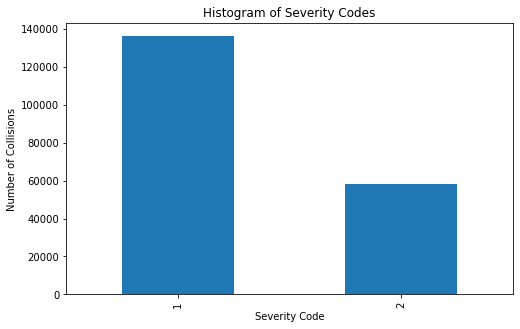

In [70]:
df.groupby('SEVERITYCODE')['SEVERITYCODE'].count().plot(kind='bar', 
                                                        figsize=(8, 5))
plt.title('Histogram of Severity Codes')
plt.ylabel('Number of Collisions') # add y-label
plt.xlabel('Severity Code') # add x-label

plt.show()

In [71]:
import seaborn as sns

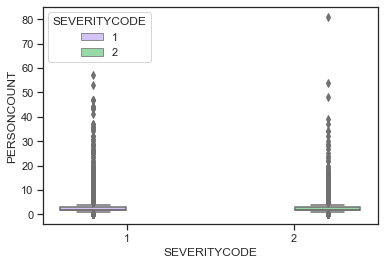

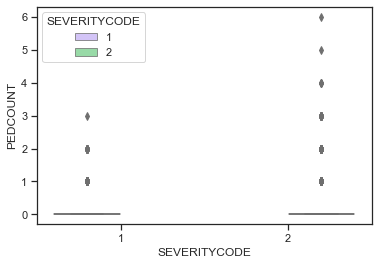

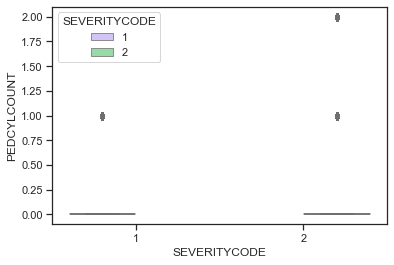

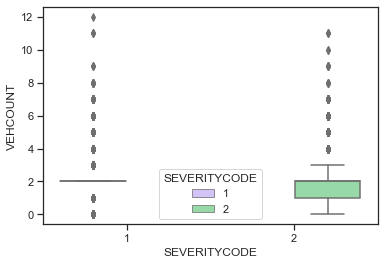

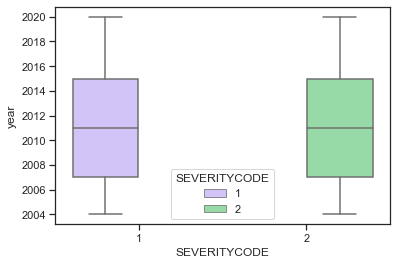

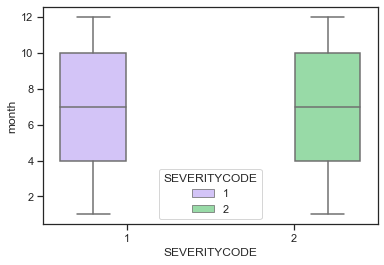

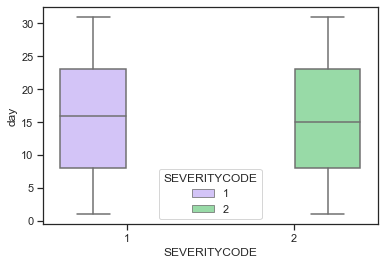

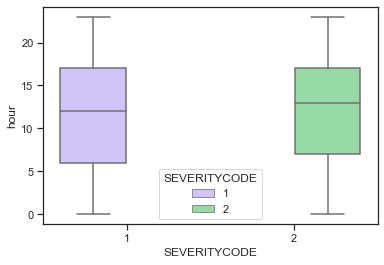

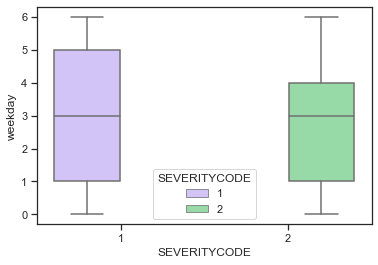

In [110]:
sns.set(style="ticks", palette="pastel")
for col in num_cols:
    sns.boxplot(x="SEVERITYCODE",y=col,
            hue="SEVERITYCODE", palette=["m", "g"],
            data=df)
    plt.show()

In [88]:
#src: https://stackoverflow.com/questions/35920885/how-to-overlay-a-seaborn-jointplot-with-a-marginal-distribution-histogram-fr
def multivariateGrid(col_x, 
                     col_y, 
                     col_k, 
                     df, 
                     k_is_color=False, 
                     scatter_alpha=.5):
    def colored_scatter(x, y, c=None):
        def scatter(*args, **kwargs):
            args = (x, y)
            if c is not None:
                kwargs['c'] = c
            kwargs['alpha'] = scatter_alpha
            plt.scatter(*args, **kwargs)

        return scatter

    g = sns.JointGrid(
        x=col_x,
        y=col_y,
        data=df
    )
    color = None
    legends=[]
    for name, df_group in df.groupby(col_k):
        legends.append(name)
        if k_is_color:
            color=name
        g.plot_joint(
            colored_scatter(df_group[col_x],df_group[col_y],color),
        )
        sns.distplot(
            df_group[col_x].values,
            ax=g.ax_marg_x,
            color=color,
        )
        sns.distplot(
            df_group[col_y].values,
            ax=g.ax_marg_y,
            color=color,            
            vertical=True
        )
    # Do also global Hist:
    sns.distplot(
        df[col_x].values,
        ax=g.ax_marg_x,
        color='grey'
    )
    sns.distplot(
        df[col_y].values.ravel(),
        ax=g.ax_marg_y,
        color='grey',
        vertical=True
    )
    plt.legend(legends)
    plt.show()

In [111]:
import itertools
num_cols_comb = itertools.combinations(num_cols, 2)

In [112]:
num_cols_comb=list(num_cols_comb)

In [186]:
num_cols_comb[0:26]

[('PERSONCOUNT', 'PEDCOUNT'),
 ('PERSONCOUNT', 'PEDCYLCOUNT'),
 ('PERSONCOUNT', 'VEHCOUNT'),
 ('PERSONCOUNT', 'year'),
 ('PERSONCOUNT', 'month'),
 ('PERSONCOUNT', 'day'),
 ('PERSONCOUNT', 'hour'),
 ('PERSONCOUNT', 'weekday'),
 ('PEDCOUNT', 'PEDCYLCOUNT'),
 ('PEDCOUNT', 'VEHCOUNT'),
 ('PEDCOUNT', 'year'),
 ('PEDCOUNT', 'month'),
 ('PEDCOUNT', 'day'),
 ('PEDCOUNT', 'hour'),
 ('PEDCOUNT', 'weekday'),
 ('PEDCYLCOUNT', 'VEHCOUNT'),
 ('PEDCYLCOUNT', 'year'),
 ('PEDCYLCOUNT', 'month'),
 ('PEDCYLCOUNT', 'day'),
 ('PEDCYLCOUNT', 'hour'),
 ('PEDCYLCOUNT', 'weekday'),
 ('VEHCOUNT', 'year'),
 ('VEHCOUNT', 'month'),
 ('VEHCOUNT', 'day'),
 ('VEHCOUNT', 'hour'),
 ('VEHCOUNT', 'weekday')]

D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


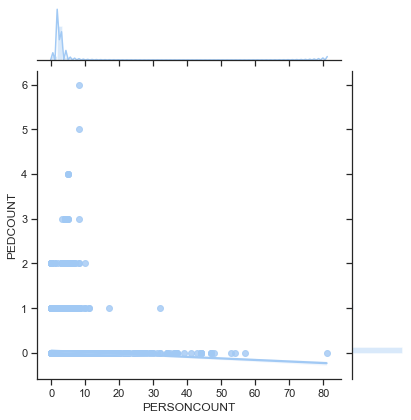

D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


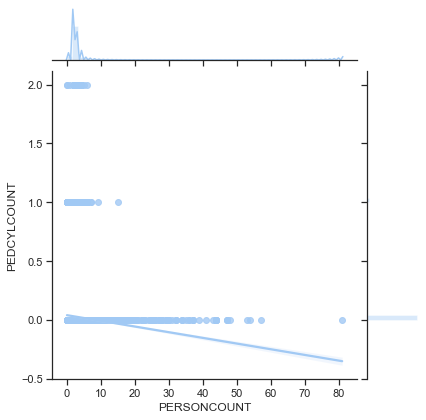

D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


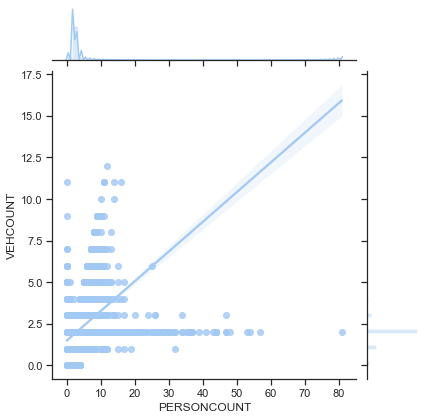

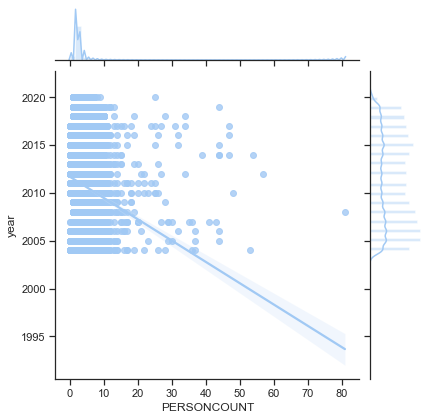

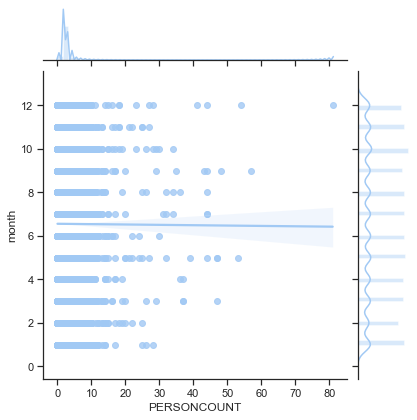

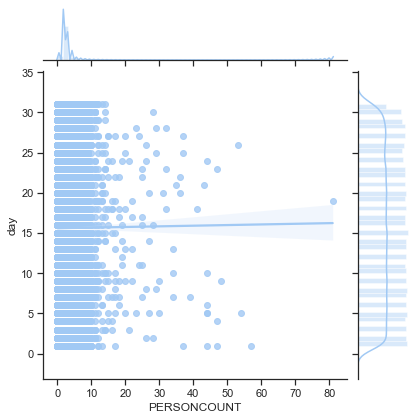

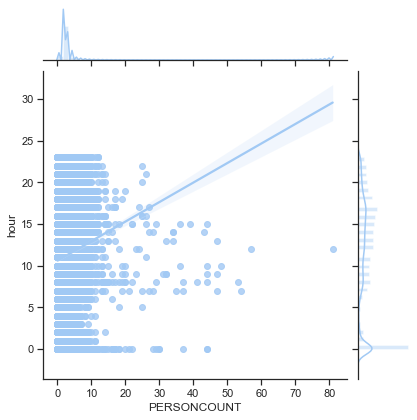

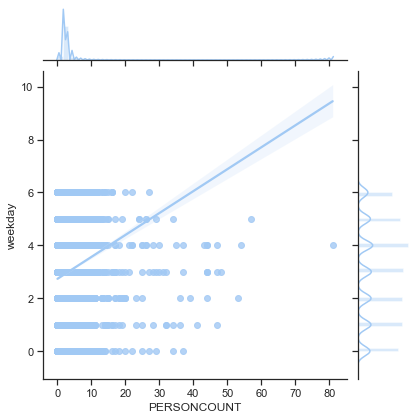

D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


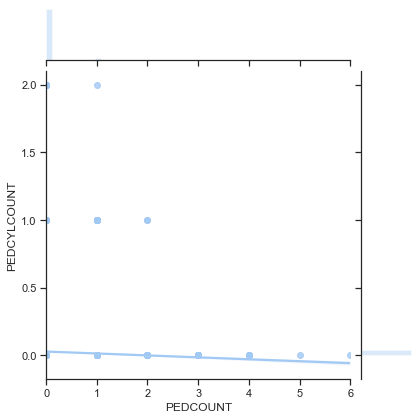

D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


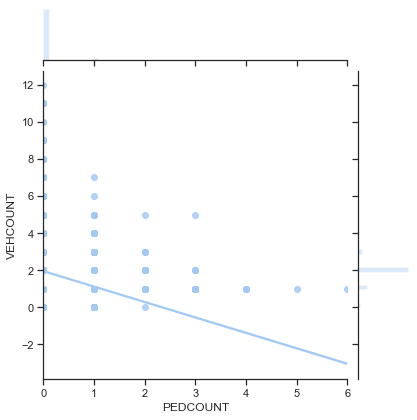

D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


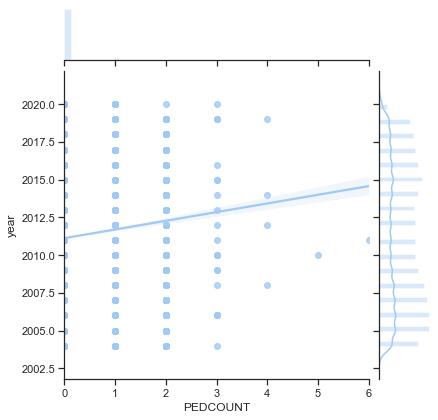

D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


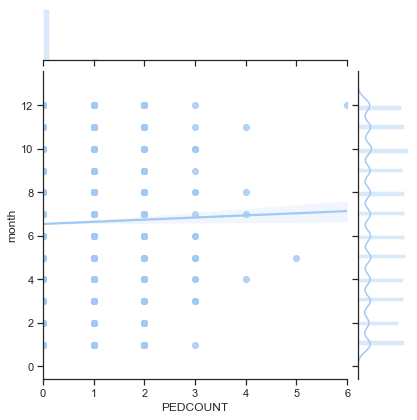

D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


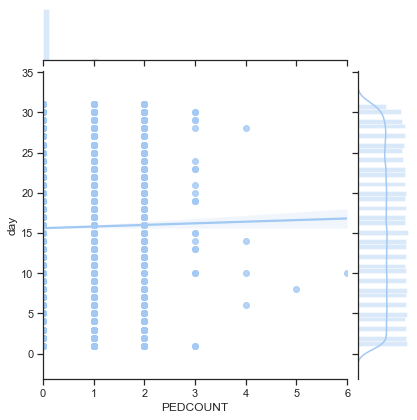

D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


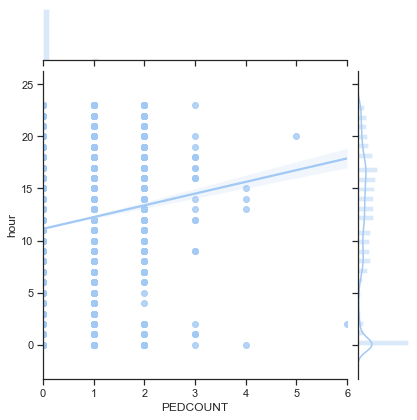

D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


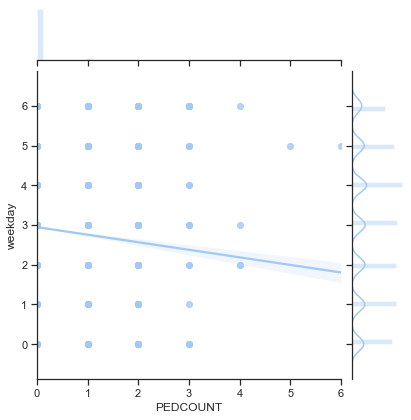

D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


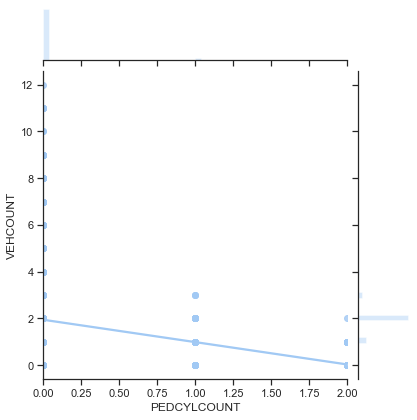

D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


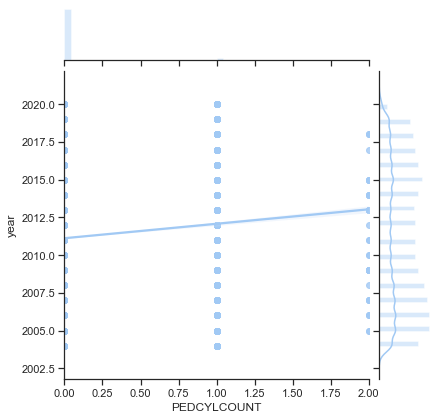

D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


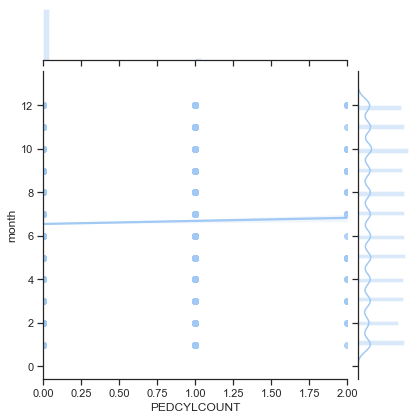

D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


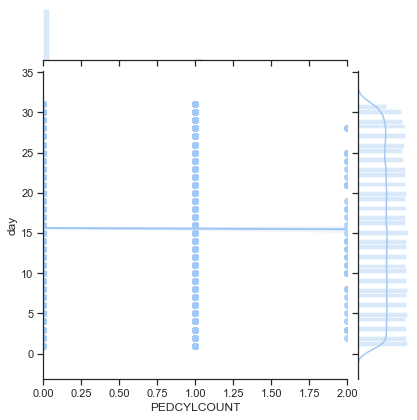

D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


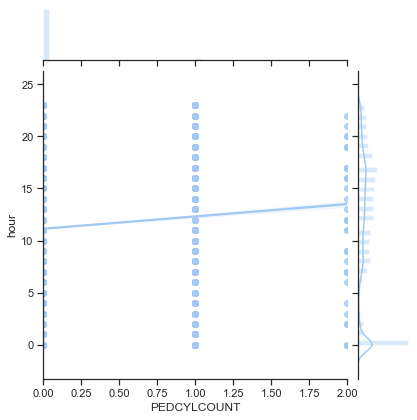

D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


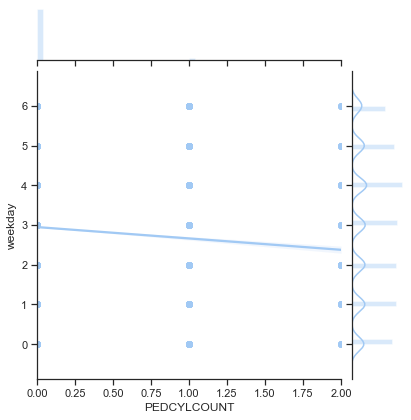

D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


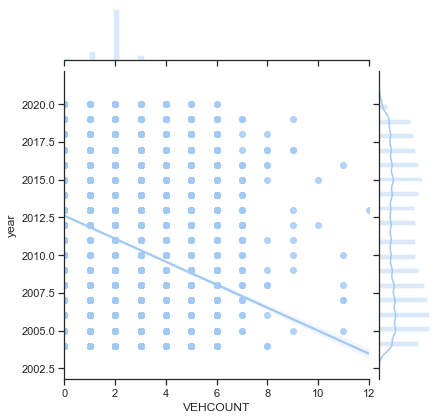

D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


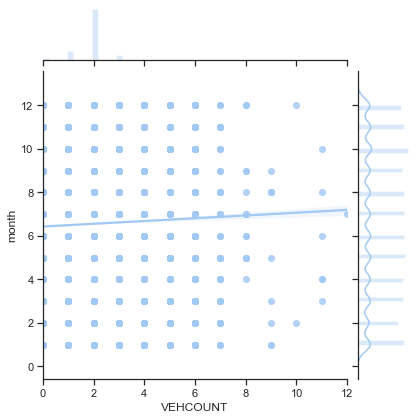

D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


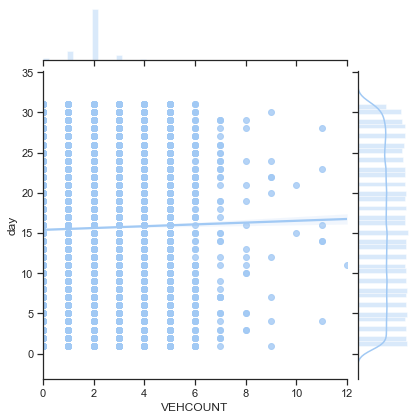

D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


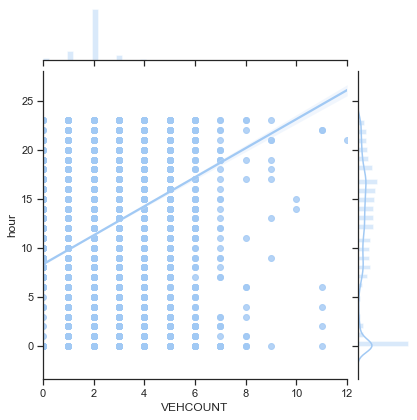

D:\Users\Pablo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


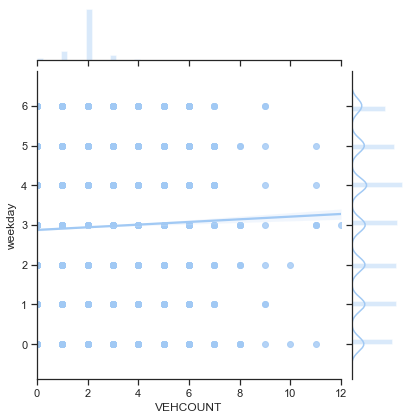

In [207]:
for comb in num_cols_comb[0:26]:
    #multivariateGrid(comb[0], comb[1], 'SEVERITYCODE', df=df)
    try:
        sns.jointplot(comb[0], comb[1], kind = 'reg', data=df)
        plt.show()
    except RuntimeError as re:
        print("test")
        if str(re).startsWith("Default bandwidth for data is 0; skipping density estimation."):
            sns.distplot(df, 
                         kde_kws={'bw': np.max([0.1,
                                                np.min([np.std(comb[0]),
                                                      np.std(comb[1])])])})
        else:
            raise re

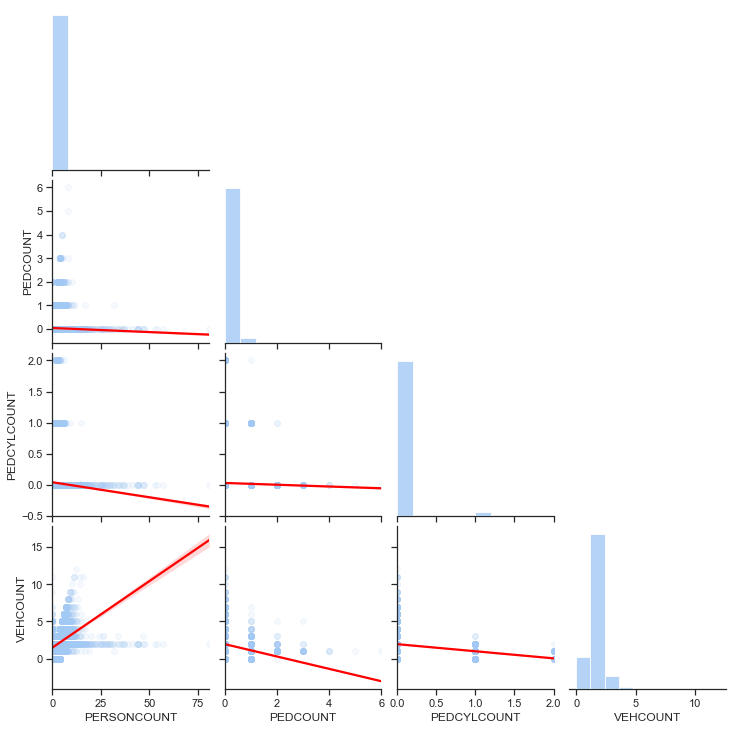

In [219]:
sns.pairplot(df, vars=['PERSONCOUNT',
            'PEDCOUNT',
            'PEDCYLCOUNT',
            'VEHCOUNT'],
            kind="reg",
            plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}},
            diag_kws={'alpha':0.8,'stacked':True},
            corner=True)

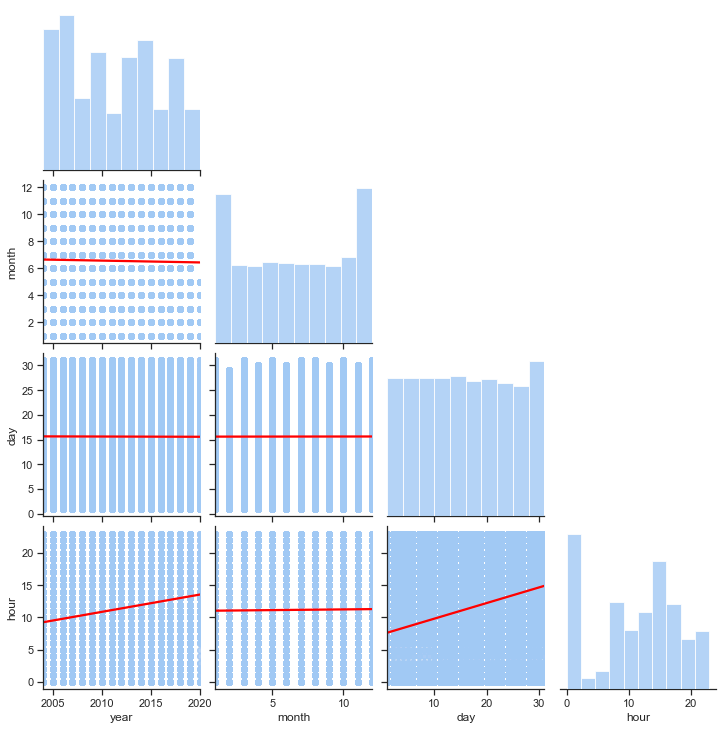

In [221]:
sns.pairplot(df, vars=['year',
            'month',
            'day',
            'hour'],
            kind="reg", 
            plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}},
            diag_kws={'alpha':0.8,'stacked':True},
            corner=True)

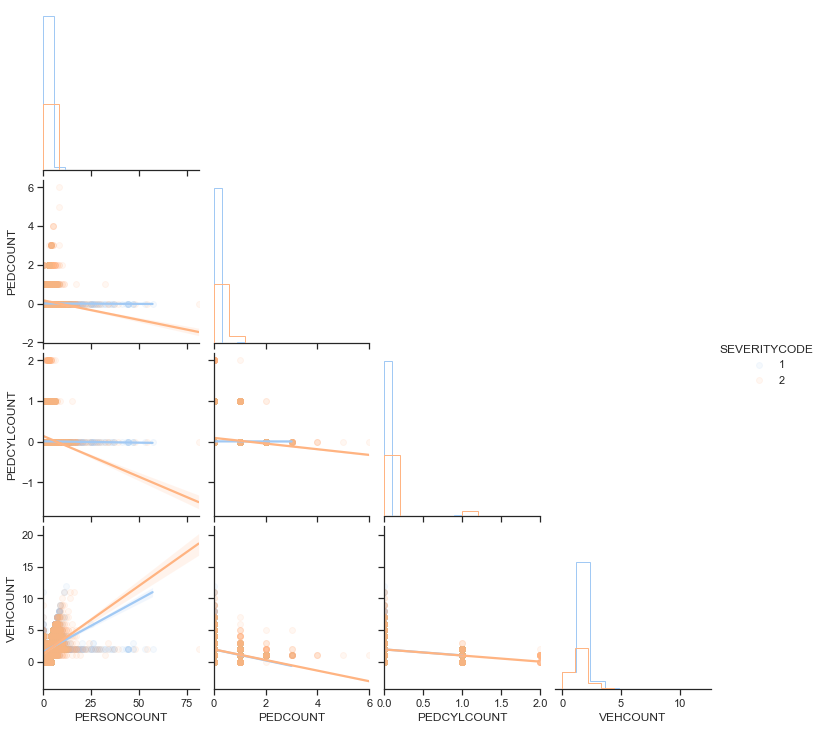

In [226]:
sns.pairplot(df, vars=['PERSONCOUNT',
            'PEDCOUNT',
            'PEDCYLCOUNT',
            'VEHCOUNT'], 
            hue="SEVERITYCODE",
            kind="reg", 
            diag_kind = "hist",
            plot_kws={'scatter_kws': {'alpha': 0.1}},
            diag_kws={'histtype':'step'},
            corner=True)

In [137]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Users\Pablo\anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be DOWNGRADED:

  folium                                        0.11.0-py_0 --> 0.5.0-py_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Folium installed and imported!


In [175]:
# define the world map centered around Canada with a low zoom level
f = folium.Figure(width=500, height=1000)
ST_map = folium.Map(location=[47.608,  -122.335], zoom_start=12).add_to(f)

# display world map
ST_map

In [176]:
from folium import plugins
# instantiate a mark cluster object for the incidents in the dataframe
collisions = plugins.MarkerCluster().add_to(ST_map)

In [180]:
df_collisions = df.loc[df.X.notnull() & df.Y.notnull()]#[0:100]
df_collisions.shape

(189339, 32)

In [ ]:
# loop through the dataframe and add each data point to the mark cluster
generate_graph = False #True if you want to generate the collision graph with markers. Quite time consuming.
if generate_graph then:
    for lat, lng, label, in zip(df_collisions.Y, 
                                df_collisions.X, 
                                df_collisions.SEVERITYCODE):
        folium.Marker(
            location=[lat, lng],
            icon=None,
            popup=label,
        ).add_to(collisions)
    ST_map.save("ST_collisions.html")
    # display map
    ST_map.show()
    

###Let's try creating a yearly gif of collisions using the following:
###https://medium.com/@rajat.mca.du.2015/creating-gifs-of-choropleth-maps-75ee47d60710